In [1]:
import numpy as np
import pandas as pd

placement = pd.read_csv("Placement_Class.csv")
placement = placement.drop("sl_no", axis = 1)
placement.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
mplace = placement.select_dtypes(include = ["int64", "float64"])
nplace = placement.select_dtypes(include = ["object"])
nplace.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
new_place = pd.DataFrame()
for cols in nplace.columns:
    temp = ohe.fit_transform(nplace[cols].values.reshape(-1, 1)).toarray()
    temp2 = pd.DataFrame(temp, columns = ohe.get_feature_names([cols]))
    new_place[temp2.columns] = temp2

In [9]:
fplace = pd.concat([mplace.loc[ : , "ssc_p" : "mba_p"], new_place, mplace["salary"]], axis = 1)
fplace.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed,salary
0,67.00,91.00,58.00,55.0,58.80,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,270000.0
1,79.33,78.33,77.48,86.5,66.28,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,200000.0
2,65.00,68.00,64.00,75.0,57.80,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,250000.0
3,56.00,52.00,52.00,66.0,59.43,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN
4,85.80,73.60,73.30,96.8,55.50,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,425000.0


,status_Placed,salary
ssc_p,0.607889,0.035330
hsc_p,0.491228,0.076819
degree_p,0.479861,-0.019272
etest_p,0.127639,0.178307
mba_p,0.076922,0.175013
gender_F,-0.090670,-0.158912
gender_M,0.090670,0.158912
ssc_b_Central,-0.037297,-0.005539
ssc_b_Others,0.037297,0.005539
hsc_b_Central,-0.016945,0.007549


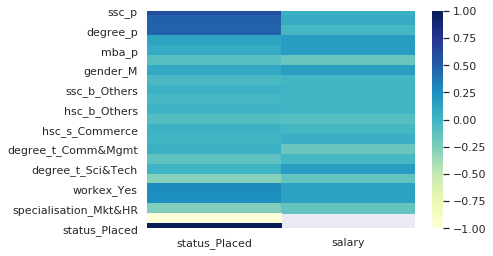

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
hmap = fplace.corr()
hemap = hmap[["status_Placed", "salary"]]
sns.heatmap(hemap, cmap = "YlGnBu")
hemap

From the DataFrame(hemap) of the correlations of the features with the targets(status, salary), we can see that the most correlated feature is ssc_p( Secondary Education percentage- 10th Grade).

We can also see that percentage matters in getting a placement, seeing as the most correlated features with the target include ssc_p, hsc_p, degree_p, etc, which are all percentages.

In [40]:
temp = placement.pivot(columns = "degree_t", values = "status")
temp.describe()

degree_t,Comm&Mgmt,Others,Sci&Tech
count,145,11,59
unique,2,2,2
top,Placed,Not Placed,Placed
freq,102,6,41


From the above, we can see that the degree specialisation most demanded is the Comm&Mgmt(Commerce and Management), seeing as they have the highest number of Placed.

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scale = StandardScaler()
features = fplace[["ssc_p", "hsc_p", "degree_p", "workex_Yes", "workex_No", "specialisation_Mkt&Fin", "specialisation_Mkt&HR"]]
scaled_placement = scale.fit_transform(features)
scaled_placement = pd.DataFrame(scaled_placement, columns = features.columns)
target = fplace["status_Placed"]
X = scaled_placement.values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 27)

The features selected for training are the most correlated features with the status(ssc_p, hsc_p, degree_p, workex, specialisation).
A Logistic Regression model can be used to predict the status.

If the salary was to be predicted, the most correlated features with the salary include; etest_p, mba_p, gender, degree_t, workex and specialisation, and these can be used with a linear regression model to predict the salary.